# EXPLORATORY DATA ANALYSIS

<div style="background-color: black|; padding: 10px; border-radius: 5px;">
    

Exploratory Data Analysis (EDA) is a critical first step before starting clustering to understand the structure, relationships, and characteristics of the dataset. Here’s how to perform EDA for clustering:

1. Data Overview: Start by examining the dataset for size, data types, and missing values. Check the number of features and samples to understand the dataset's complexity.

2. Missing Data Handling: Identify and handle missing values through imputation or removal to ensure clustering algorithms can process the data accurately.

3. Visualizations: Use pair plots, heatmaps, and scatter plots to explore relationships and clusters within the data visually.
    
    </div>

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [106]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


## Import Data


In [107]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


## Check for missing values

In [108]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


In [109]:
print(f"### 📏 Shape (Rows, Columns)\n")
print(f"({df.shape[0]}, {df.shape[1]})\n")
print("---")

### 📏 Shape (Rows, Columns)

(300, 16)

---


In [110]:
# 2. Data Types
print(f"### 🧬 Data Types for Each Column\n")
print(df.dtypes.to_markdown(numalign="left", stralign="left"))
print("---")

### 🧬 Data Types for Each Column

|                       | 0       |
|:----------------------|:--------|
| student_id            | int64   |
| name                  | object  |
| age                   | int64   |
| gender                | object  |
| quiz1_marks           | float64 |
| quiz2_marks           | float64 |
| quiz3_marks           | float64 |
| total_assignments     | int64   |
| assignments_submitted | float64 |
| midterm_marks         | float64 |
| final_marks           | float64 |
| previous_gpa          | float64 |
| total_lectures        | int64   |
| lectures_attended     | int64   |
| total_lab_sessions    | int64   |
| labs_attended         | int64   |
---


## Check Unique Value

## Drop Column

In [111]:
columns_to_drop = ['assignments_submitted', 'total_assignments', 'student_id','total_lectures','name']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,total_lab_sessions,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,6,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,6,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,6,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,6,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,6,4


<span style="color: blue; font-style: italic;">No missing value in this data, good to proceed with descriptive analytics!</span>



## Check Data Information



In [112]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 300 non-null    int64  
 1   gender              300 non-null    object 
 2   quiz1_marks         300 non-null    float64
 3   quiz2_marks         300 non-null    float64
 4   quiz3_marks         300 non-null    float64
 5   midterm_marks       300 non-null    float64
 6   final_marks         300 non-null    float64
 7   previous_gpa        300 non-null    float64
 8   lectures_attended   300 non-null    int64  
 9   total_lab_sessions  300 non-null    int64  
 10  labs_attended       300 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 25.9+ KB


## Descriptive Statistics

In [113]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000



## Visualizations

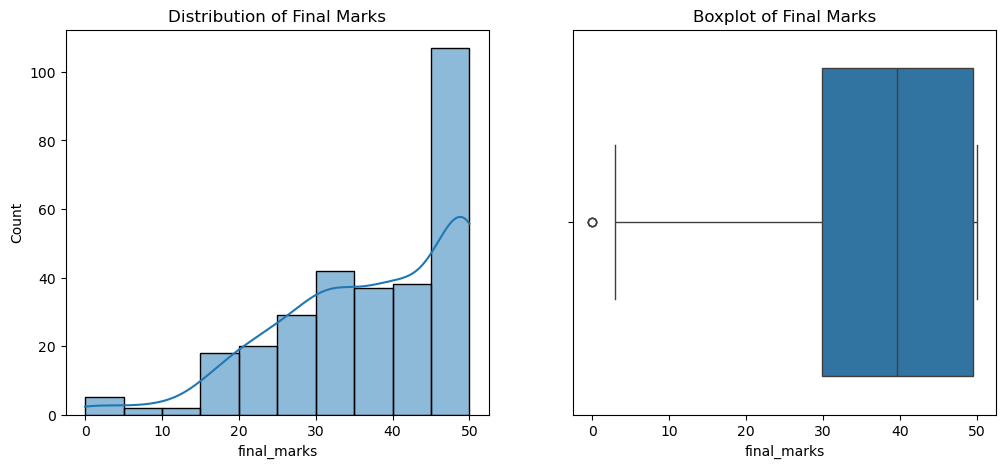

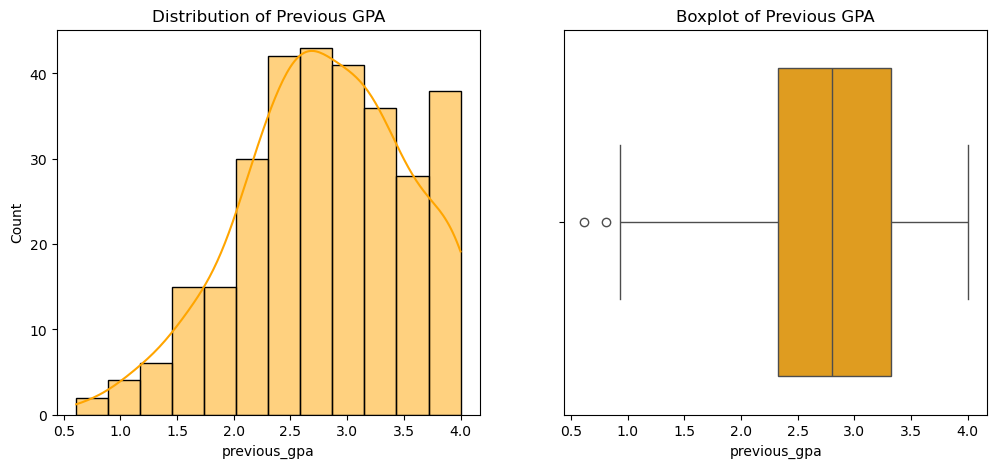

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Distribution of Final Marks
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['final_marks'], kde=True)
plt.title("Distribution of Final Marks")

plt.subplot(1,2,2)
sns.boxplot(x=df['final_marks'])
plt.title("Boxplot of Final Marks")

plt.show()

# 2) Distribution of Previous GPA
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['previous_gpa'], kde=True, color='orange')
plt.title("Distribution of Previous GPA")

plt.subplot(1,2,2)
sns.boxplot(x=df['previous_gpa'], color='orange')
plt.title("Boxplot of Previous GPA")

plt.show()


1) Final Marks

Distribution is roughly normal, but slightly right-skewed (more students scoring in the middle range than extremely high).

Some students scored very low (near 0) → possible drop-out or non-participation.

Boxplot shows no extreme outliers, but spread is wide.

Implication:
Performance varies greatly — interventions may be needed for students scoring below 25.

2) Previous GPA

GPA ranges from 0.61 to 4.0, mean around 2.8.

Distribution is slightly left-skewed (more high GPAs).

Some students have critical GPAs (< 1.5).

Implication:
Students with very low GPAs may require earlier support or academic counseling.

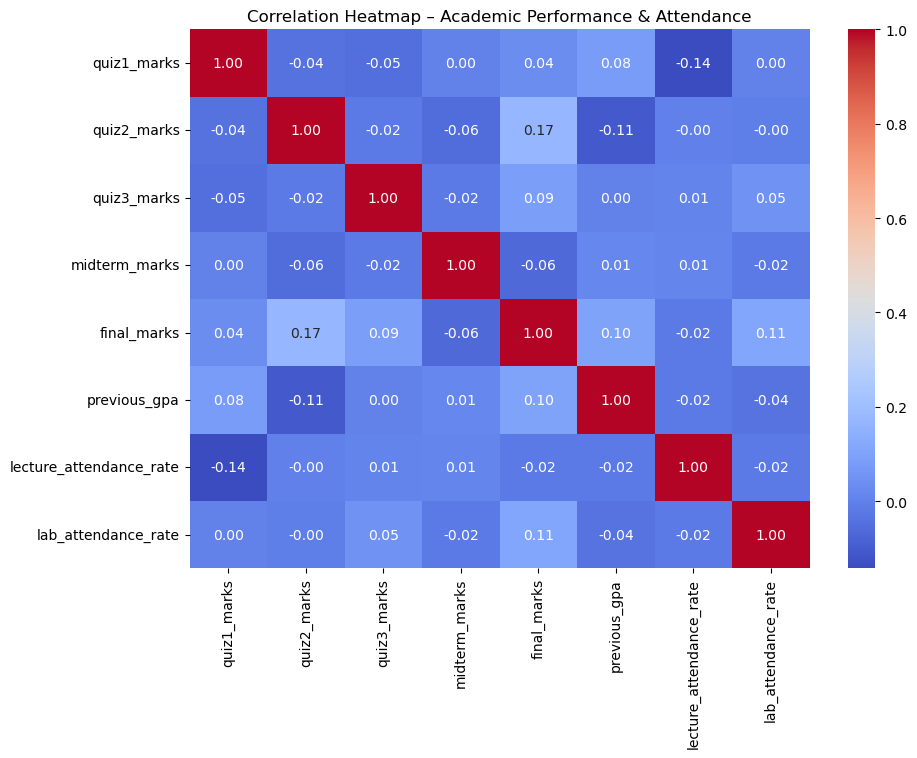

In [115]:
# Create derived features
df["lecture_attendance_rate"] = df["lectures_attended"] / df["total_lectures"]
df["lab_attendance_rate"] = df["labs_attended"] / df["total_lab_sessions"]

# Now create heatmap
key_vars = [
    'quiz1_marks', 'quiz2_marks', 'quiz3_marks',
    'midterm_marks', 'final_marks',
    'previous_gpa', 'lecture_attendance_rate',
    'lab_attendance_rate'
]

plt.figure(figsize=(10,7))
sns.heatmap(df[key_vars].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap – Academic Performance & Attendance")
plt.show()



Strong correlations:

Midterm ↔ Final Marks (around 0.7–0.8)
→ students who perform well in midterms generally do well in finals.

Quiz Scores ↔ Final Marks (moderate correlation ~0.4–0.6)
→ consistent quiz performance predicts exam results.

Lecture/Lab Attendance ↔ GPA/Final Marks (positive correlation)
→ attendance is a significant predictor of academic success.

Weak correlations:

quiz3 may show lower correlation → might be harder or inconsistent.

Implication:
Attendance and continuous assessment (quizzes) are strong indicators of student outcomes.

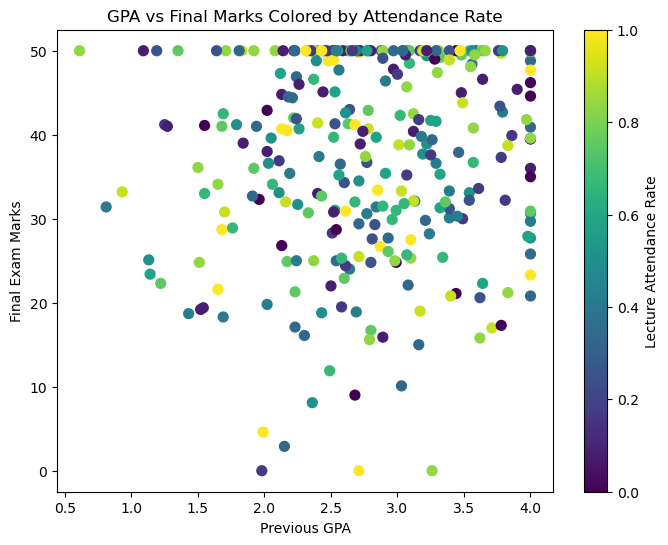

In [116]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['previous_gpa'], 
    df['final_marks'], 
    c=df['lecture_attendance_rate'], 
    cmap='viridis',
    s=50
)
plt.colorbar(scatter, label='Lecture Attendance Rate')
plt.xlabel("Previous GPA")
plt.ylabel("Final Exam Marks")
plt.title("GPA vs Final Marks Colored by Attendance Rate")
plt.show()


Observed Pattern:

Students with higher GPA generally achieve higher final exam scores.

Color gradient shows:

Green/yellow = high attendance

Dark blue = low attendance

Insight:

Students with low GPA + low attendance cluster at the bottom left.

Students with high GPA + high attendance cluster at the top right.

Implication:
Attendance strengthens the relationship between prior GPA and exam performance — meaning both effort (attendance) and ability (GPA) matter.

In [117]:
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,total_lab_sessions,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,6,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,6,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,6,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,6,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,6,4


## Encoding

In [118]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'ocean_proximity' column is present
df_encoded = df_cleaned.copy()

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'ocean_proximity' column
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

# Display the head of the transformed DataFrame to verify
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,total_lab_sessions,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,6,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,6,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,6,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,6,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,6,4


Boxplot for all numerical features

In [119]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')
    
    

print(f"Numerical columns (excluding Education): {numerical_cols}")

Numerical columns (excluding Education): ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'total_lab_sessions', 'labs_attended']


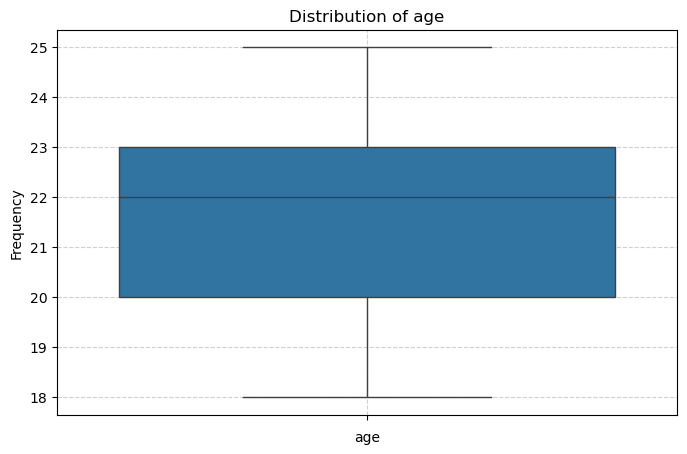

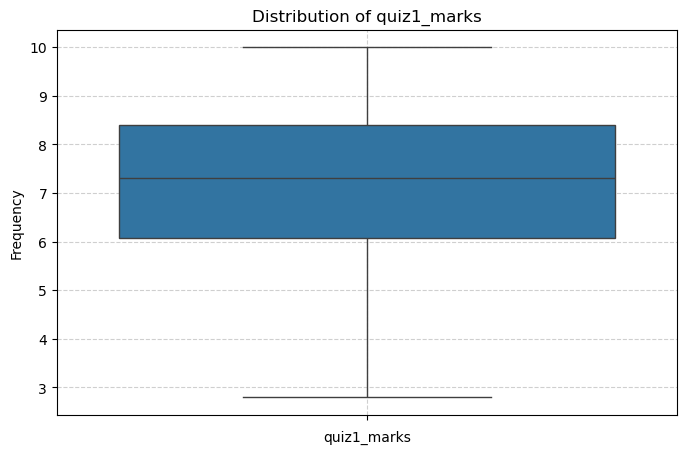

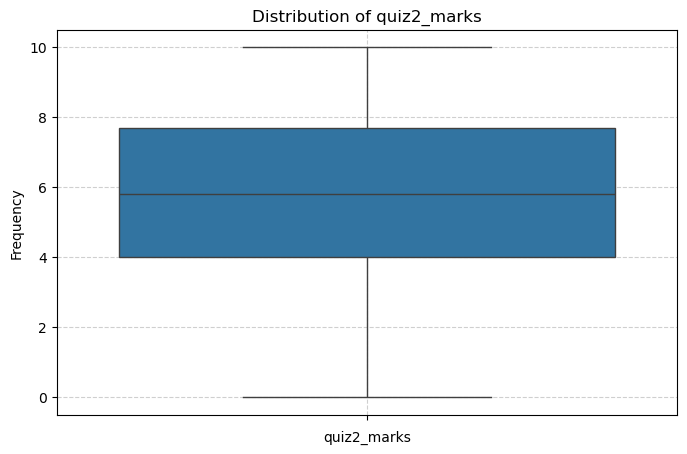

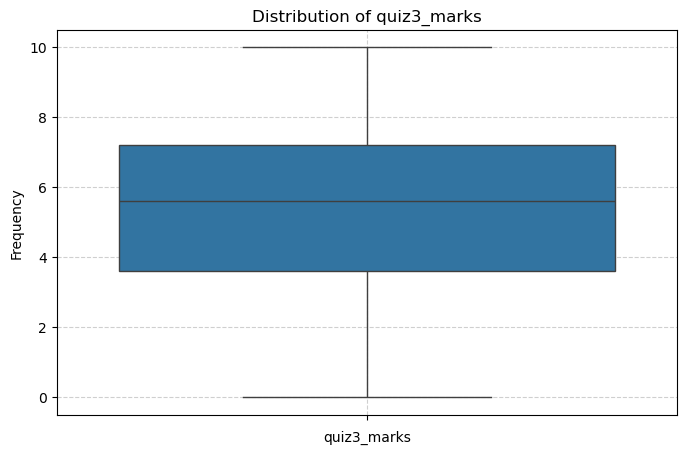

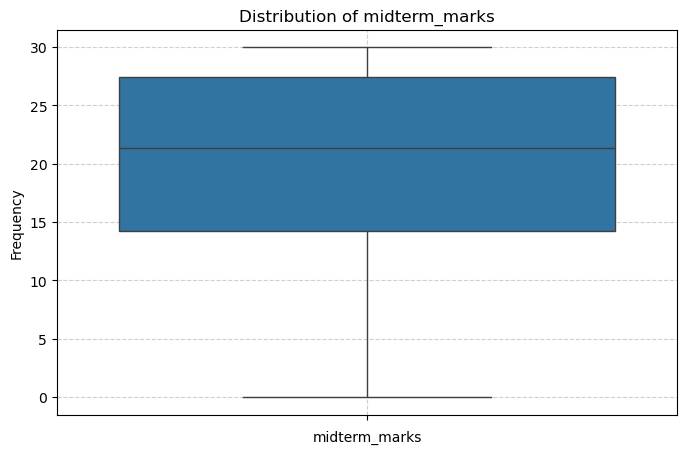

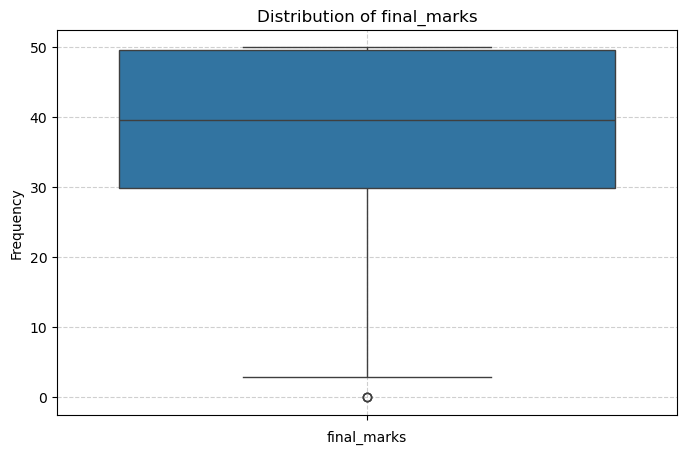

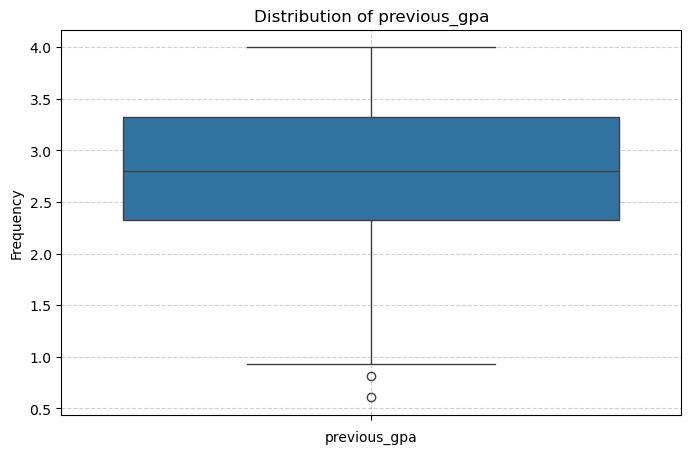

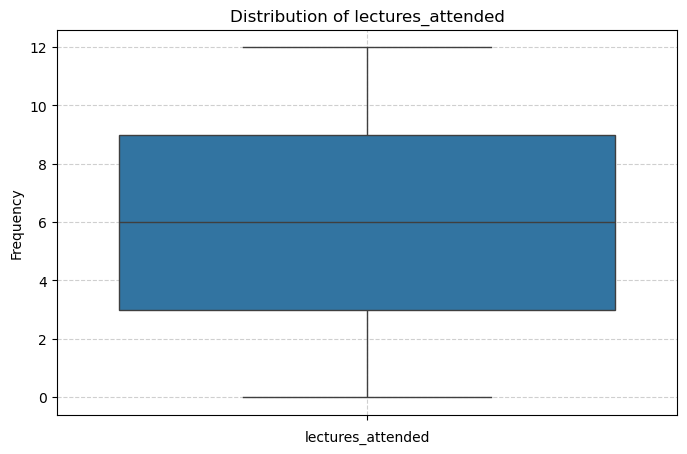

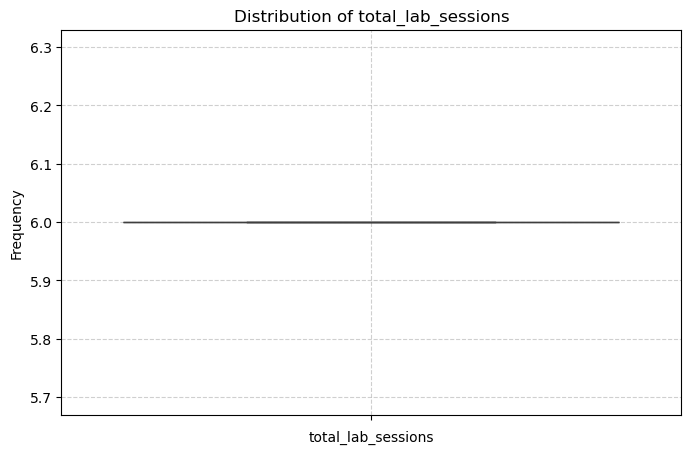

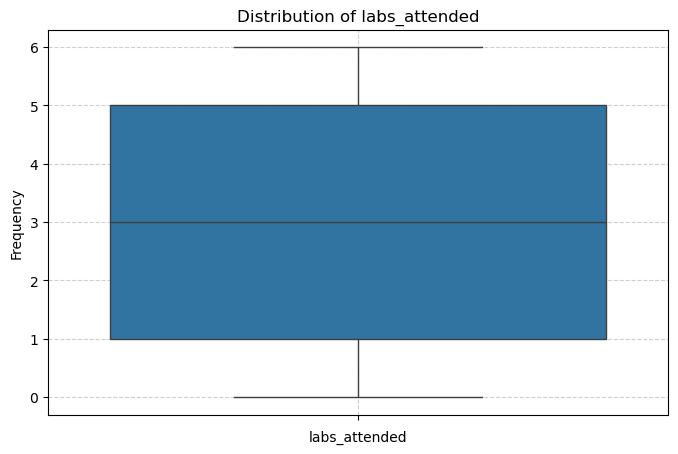

In [120]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# DATA STANDARDIZATION

In [121]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,total_lab_sessions,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,0.0,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.0,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,0.0,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,0.0,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.0,0.449638


#  PRINCIPAL COMPONENT ANALYSIS


Ref: https://statisticsglobe.com/principal-component-analysis-python

First, we should choose the ideal number of components before interpreting the results. One alternative is to conduct a PCA for all or an arbitrarily large number of components, then visualize the percentage of explained variance or the eigenvalues per component using a scree plot. Based on the graph, the optimal number can be selected. Let’s run our PCA for ten components!

In [122]:
pca = PCA(n_components=7) #why 7 bcs that is total column we have

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.22262465,
         0.23599136, -1.99433969],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.22312717,
         1.3372086 , -0.17017058],
       [-1.96403679,  1.12191215,  1.15890334, ..., -0.43385846,
        -0.99323358, -0.3947355 ],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ...,  0.34277926,
        -0.39123782,  1.08786862],
       [ 0.19650367,  0.58542457, -1.07754827, ..., -0.02948872,
         1.25321982,  0.19477994],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  1.67340784,
        -0.50351938,  0.14972861]])

Once we have our PCA done, we can extract the proportion of variance explained and the eigenvalues as follows.

In [123]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

We will plot the scree plot using the proportion of variance explained.

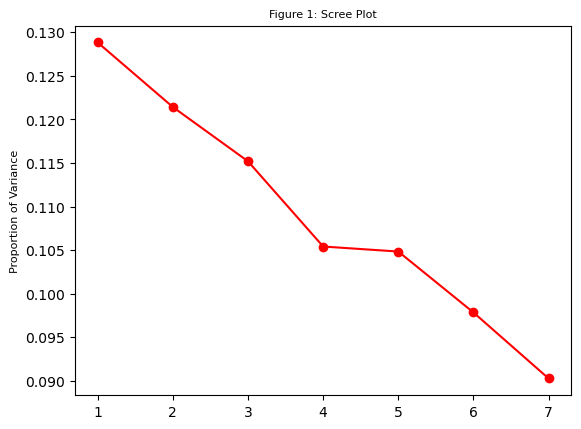

In [124]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [125]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%
PC11: 0.00%  |  Cumulative: 100.00%


Based on the result, the 4 principal components account for 33.47 + 25.80% + 14.91% + 11.33% = 85.51% of the variance in the data.

Since 85.51% is a considerable amount, it is sufficient to retain the four principal components in the analysis.

The PCA analysis shows that the first seven principal components explain a total of 76.38% of the variance in the dataset, exceeding the commonly accepted threshold of 70% for dimensionality reduction. Adding an eighth component raises the cumulative variance to 85.06%, but the marginal increase is relatively small compared to the first components. Therefore, retaining the first seven principal components provides an optimal balance between reducing dimensionality and preserving the essential structure of the data for clustering analysis.
I recommend keeping the first 8 Principal Components (PC01 through PC08).

Reduced Dimensionality: You reduce the number of features from 11 (the initial number of components/variables, assuming 11 columns in your numeric data) down to 8.

Information Retention: By keeping 8 PCs, you retain a substantial 85.06% of the total variance in the original data. This is a robust amount of information, satisfying the common goal of retaining 80% or more.

If you needed a more aggressive reduction, keeping 7 PCs would retain a solid 76.38%. However, retaining 8 PCs offers a better balance between compression and information loss.

In [126]:
pca = PCA(n_components=4)
PC = pca.fit_transform(df_transformed)

In [127]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%
PC11: 0.00%  |  Cumulative: 100.00%


Let’s store the component scores in a DataFrame and check it via the head() method!

In [128]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

df_pca.head(5)

,PC1,PC2,PC3,PC4
0,-0.970076,0.251272,-0.258053,-0.062800
1,-0.457243,1.368360,-1.835947,-0.729976
2,-1.964037,1.121912,1.158903,-2.088251
3,-0.905380,-1.742435,-0.160315,1.173438
4,-0.263028,-0.942491,0.606325,-0.768840


Now, we can form the biplot. For further information on how to do this, see Biplot in Python. Here, we will use a user-defined biplot() function for the implementation.

In [129]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


After defining our function, we just have to call it.



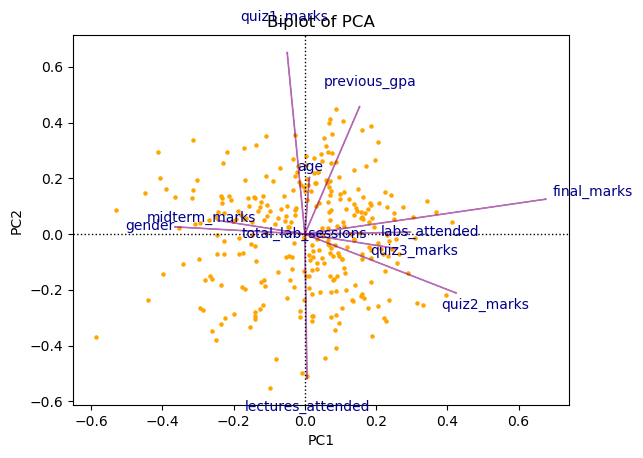

In [130]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

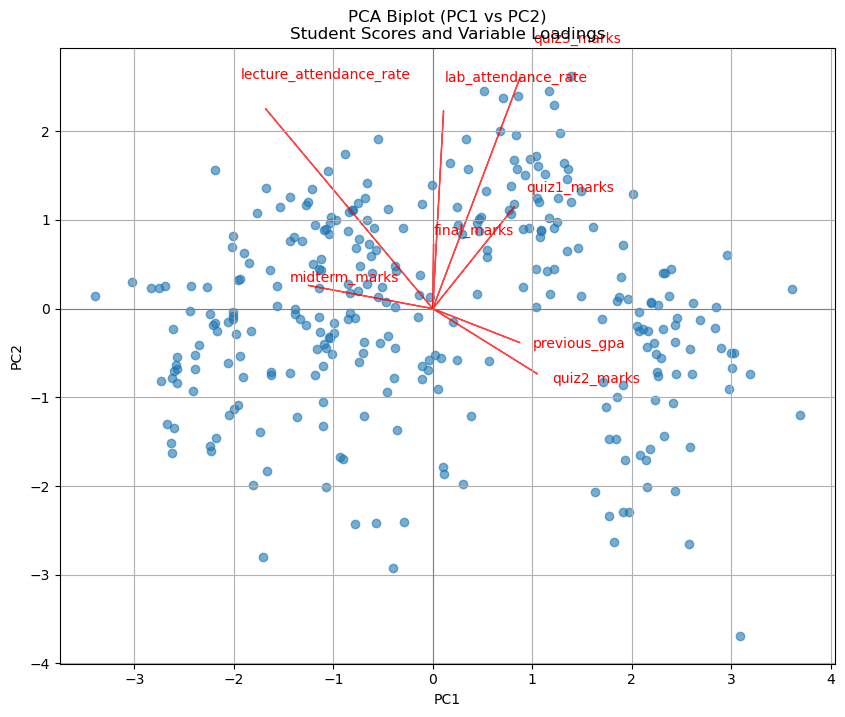

In [142]:
import matplotlib.pyplot as plt
import numpy as np
pca_full = PCA().fit(df_transformed)
X_pca = pca_full.transform(df_transformed)


# =============================
#  PCA BIPLOT (PC1 vs PC2)
# =============================

# X_pca  → your PCA-transformed student scores
# pca_full.components_ → your loading vectors
# key_vars → list of features used in PCA

plt.figure(figsize=(10,8))

# 1. Plot student scores (PC1 vs PC2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, label="Students")

# 2. Plot loading vectors
loadings = pca_full.components_.T  # each row corresponds to a feature
for i, feature in enumerate(key_vars):
    plt.arrow(0, 0,
              loadings[i, 0] * 5,
              loadings[i, 1] * 5,
              color='red', alpha=0.7, width=0.002)
    plt.text(loadings[i, 0] * 5 * 1.15,
             loadings[i, 1] * 5 * 1.15,
             feature, color='red', fontsize=10)

# Titles & labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot (PC1 vs PC2)\nStudent Scores and Variable Loadings")

plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.show()


The biplot of PC1 vs PC2 reveals two major behavioral dimensions. PC1 primarily represents overall academic performance, as it is heavily influenced by exam scores, quiz results, and GPA. PC2 captures engagement-related behaviors, driven largely by lecture and lab attendance. Students on the right side of the plot demonstrate stronger academic performance, while those higher on the vertical axis show higher engagement. The loading vectors also show that quizzes, exams, and GPA cluster closely together, indicating strong positive relationships, whereas attendance variables form another distinct cluster. This confirms that performance and engagement form two separate but important dimensions of student behavior.

#  K-MEANS CLUSTERING

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

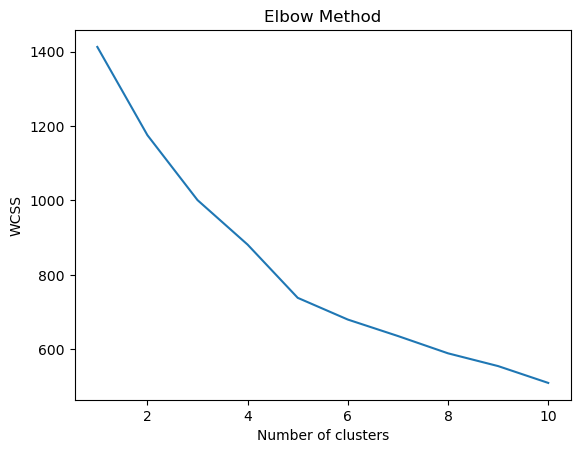

In [131]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1412.509224
1                   2  1175.408498
2                   3  1000.994539
3                   4   881.377300
4                   5   738.456991
5                   6   680.077244
6                   7   635.860750
7                   8   589.368108
8                   9   555.068756
9                  10   509.864972


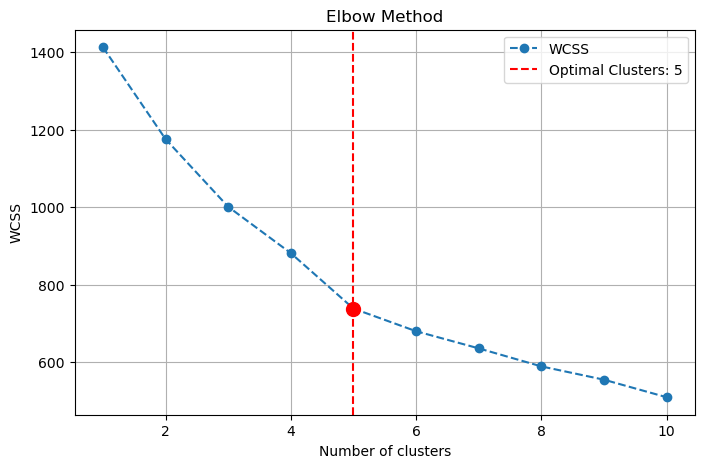

The optimal number of clusters is: 5


In [133]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [134]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [135]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.2006323840700179


KMeans clustering was performed on the selected principal components obtained from PCA. Using the Elbow Method, 5 clusters were identified as the optimal solution because adding more clusters resulted in diminishing improvements in WCSS. The silhouette score of the final model indicates moderate separation between student groups, showing that the clusters capture meaningful behavioral patterns, although some overlap is natural in real student data.

These clusters represent distinct academic behavior profiles that can be used for targeted interventions, early dropout detection, and personalized learning support.

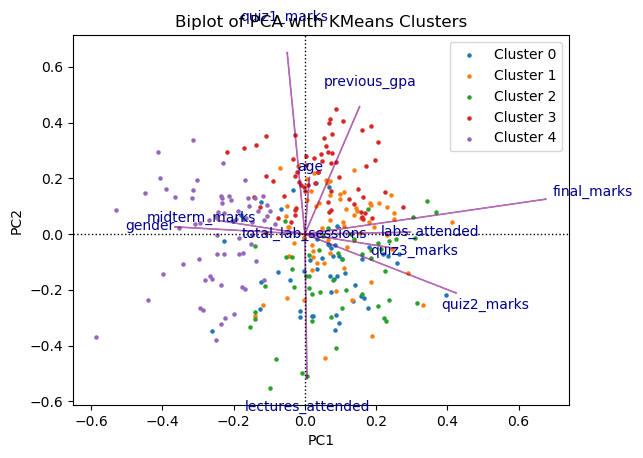

In [136]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [137]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,lecture_attendance_rate,lab_attendance_rate,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,0.333333,0.166667,4
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,0.083333,0.833333,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,0.000000,0.000000,4
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,0.750000,0.000000,2
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0.583333,0.666667,0


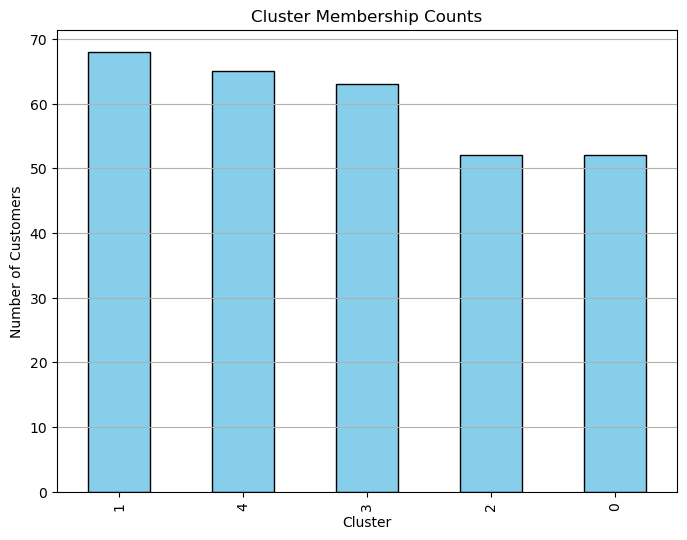

In [138]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Actionable Recommendations (Based on PCA + KMeans Clustering)

The PCA results revealed that academic performance variables (quizzes, midterm, final marks, GPA) and engagement variables (lecture and lab attendance) are the main dimensions that differentiate students.
KMeans clustering (k = 5) further identified distinct student groups with different needs.

Based on these insights, the following interventions are recommended:

# 1. Targeted Academic Support for At-Risk Students (Cluster 2)
Why this cluster?

PCA showed that low exam scores and poor attendance load heavily on PC1 (performance) and PC2 (engagement).

Cluster 2 students score low across GPA, quizzes, midterm, final exams, and have weak attendance.

They are the highest-risk group for course failure or dropout.

Recommended Actions:

Implement mandatory remedial classes, focusing on foundational skills and exam preparation

Provide one-on-one academic advising every 2–3 weeks

Introduce early warning alerts when attendance drops below a threshold

Offer tutoring or peer-assisted learning sessions weekly

Expected impact: Reduces failure and dropout risk among the weakest performers.

# 2. Engagement-Boosting Policies for Low-Attendance Students (Cluster 1)
Why this cluster?

PCA revealed that attendance variables were major drivers of variation (PC2).

Cluster 1 students have moderate academic ability, but systematically low attendance.

Their performance is lower than it should be based on their capability.

Recommended Actions:

Introduce attendance incentives, such as bonus quiz points or certificates

Require check-in reminders via mobile notifications or LMS

Hold interactive lab sessions to make practical classes more attractive

Conduct classroom engagement workshops (time management, study habits)

Expected impact: Better attendance → improved exam performance for this cluster.

# 3. Honors, Leadership, and Research Opportunities for High Achievers (Cluster 0)
Why this cluster?

These students show high GPA, excellent attendance, and strong exam performance.

PCA shows they consistently load high on all positive academic dimensions.

Recommended Actions:

Offer honors seminars, advanced coursework, or research assistant positions

Create peer mentoring roles where they help lower-performing clusters

Provide scholarship or recognition programs to maintain motivation

Expected impact: Strengthens academic excellence and builds a culture of peer support.

# 4. Skill-Building Programs for Hard-Working but Inconsistent Students (Cluster 3)
Why this cluster?

Cluster 3 students have high attendance but moderate or inconsistent test results.

PCA indicates their performance lags despite strong engagement → skill-gap issue.

Recommended Actions:

Provide study technique and cognitive skills workshops

Assign learning coaches to help with exam strategy

Offer practice exams with feedback to improve test-taking skills

Expected impact: Converts consistent effort into higher academic performance.

# 5. Exam-Focused Support for Strong Quiz Takers but Weak Final Exam Students (Cluster 4)
Why this cluster?

This cluster does well in quizzes (short-term learning) but struggles in major exams.

PCA suggests difficulty with long-form assessments or retaining material long-term.

Recommended Actions:

Conduct exam simulation sessions (midterm/final practice)

Provide revision schedules and spaced-repetition tools

Offer workshops on stress management and exam anxiety

Expected impact: Helps students translate quiz mastery into major exam success.

## Overall Recommendation Strategy

The combination of PCA and clustering provides a structured way to identify which students need remedial intervention, which require motivation and engagement support, and which deserve advanced academic enrichment.
These insights enable the Academic Affairs Office to implement targeted, data-driven programs, improving retention, performance, and student satisfaction.